In [ ]:
#Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importing the data
data = pd.read_csv('Loan-Prediction.csv')
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
#Setting the Loan_ID as index

data = data.set_index("Loan_ID")
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001445,Male,Yes,2,Not Graduate,No,4136,0,149.0,480.0,0.0,Rural
LP002791,Male,No,1,Graduate,NaN,16000,5000,40.0,360.0,1.0,Semiurban
LP001501,Male,Yes,0,Graduate,No,3500,3250,140.0,360.0,1.0,Semiurban
LP002344,Male,Yes,0,Graduate,No,3510,828,105.0,360.0,1.0,Semiurban
LP002420,Male,Yes,0,Graduate,No,2982,1550,110.0,360.0,1.0,Semiurban


In [ ]:
# Data information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


Obs - The no. of Rows, column are 614,12 respectively. The numerical column(5) and categorical data(7)

In [ ]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,356,2,Male,286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,367,2,Yes,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,357,4,0,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,367,2,Graduate,283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,344,2,No,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,367.0,NaN,NaN,NaN,4805.599455,4910.685399,0.0,2864.0,3786.0,5060.0,72529.0
CoapplicantIncome,367.0,NaN,NaN,NaN,1569.577657,2334.232099,0.0,0.0,1025.0,2430.5,24000.0
LoanAmount,362.0,NaN,NaN,NaN,136.132597,61.366652,28.0,100.25,125.0,158.0,550.0
Loan_Amount_Term,361.0,NaN,NaN,NaN,342.537396,65.156643,6.0,360.0,360.0,360.0,480.0
Credit_History,338.0,NaN,NaN,NaN,0.825444,0.38015,0.0,1.0,1.0,1.0,1.0


In [ ]:
# Missing values
features_with_na = [features for features in data.columns if data[features].isnull().sum()>1]

for feature in features_with_na:
    print(f"{feature}: {data[feature].isnull().mean() * 100:.3f}% missing values")

In [61]:
# Numerical Feartures

numerical_feature = [feature for feature in data.columns if data[feature].dtypes != "O"]
print("No. of Numerical variable:",len(numerical_feature))
data[numerical_feature].head()

No. of Numerical variable: 5


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_ID,,,,,
LP001015,5720,0,110.0,360.0,1.0
LP001022,3076,1500,126.0,360.0,1.0
LP001031,5000,1800,208.0,360.0,1.0
LP001035,2340,2546,100.0,360.0,1.0
LP001051,3276,0,78.0,360.0,1.0


In [62]:
# Categorical Features

categorical_features = [feature for feature in data.columns if data[feature].dtypes == "O"]
print("No. of Categorical Features:",len(categorical_features))
data[categorical_features].head()

No. of Categorical Features: 6


,Gender,Married,Dependents,Education,Self_Employed,Property_Area
Loan_ID,,,,,,
LP001015,Male,Yes,0,Graduate,No,Urban
LP001022,Male,Yes,1,Graduate,No,Urban
LP001031,Male,Yes,2,Graduate,No,Urban
LP001035,Male,Yes,2,Graduate,No,Urban
LP001051,Male,No,0,Not Graduate,No,Urban


In [ ]:
print(data["Gender"].value_counts())
print(data["Dependents"].value_counts())
print(data["Self_Employed"].value_counts())

Gender
Male      286
Female     70
Name: count, dtype: int64
Dependents
0     200
2      59
1      58
3+     40
Name: count, dtype: int64
Self_Employed
No     307
Yes     37
Name: count, dtype: int64


In [ ]:
print(data['Loan_Amount_Term'].nunique())
print(data['LoanAmount'].nunique())
print(data['Credit_History'].nunique())

12
144
2


In [ ]:
# Filling Null Values

data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [63]:
# Droping Null Values

data = data.dropna(subset = ['Gender','Dependents','Self_Employed'])
data.isnull().sum().sum()

0

The Null Values are cleaned the data

In [69]:
# Checking the duplicates in the data

print("Number of duplicates: ", data.duplicated().sum())

Number of duplicates:  1


In [71]:
dup_row = data[data.duplicated(keep = False)]
dup_row

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001211,Male,No,0,Graduate,Yes,5833,0,116.0,360.0,1.0,Urban
LP002083,Male,No,0,Graduate,Yes,5833,0,116.0,360.0,1.0,Urban


In [72]:
# Removing Duplicated value

data.drop_duplicates(inplace=True)
print("Number of duplicates: ", data.duplicated().sum())

Number of duplicates:  0


In [76]:
data["Dependents"].value_counts()

,count
Dependents,
0,185
2,54
1,48
3+,36


In [81]:
# Fixing the column of dependents to coonvert top numeric data type

data['Dependents'] = data['Dependents'].str.replace("+","")
data['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [82]:
# Changing the data type from string to integer

data['Dependents'] = data['Dependents'].astype(int)
data['Dependents'].unique()

array([0, 1, 2, 3])

In [88]:
#Categorical Analysis

data.describe(include = 'object').T

,count,unique,top,freq
Gender,323,2,Male,258
Married,323,2,Yes,209
Education,323,2,Graduate,250
Self_Employed,323,2,No,290
Property_Area,323,3,Urban,124


In [89]:
#Numerical Analysis

data.describe(include = ['int','float'])

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,0.817337,4718.640867,1590.340557,136.414861,343.938080,0.851393
std,1.075161,4883.842070,2417.144562,62.431588,63.688849,0.356252
min,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000
25%,0.000000,2885.500000,0.000000,101.500000,360.000000,1.000000
50%,0.000000,3786.000000,1083.000000,125.000000,360.000000,1.000000
75%,2.000000,5000.000000,2416.500000,156.000000,360.000000,1.000000
max,3.000000,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [90]:
# Correlation

data[numerical_feature].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.098961,0.505291,0.024513,0.095153
CoapplicantIncome,-0.098961,1.000000,0.174696,0.005746,-0.074299
LoanAmount,0.505291,0.174696,1.000000,0.118350,-0.013975
Loan_Amount_Term,0.024513,0.005746,0.118350,1.000000,-0.048860
Credit_History,0.095153,-0.074299,-0.013975,-0.048860,1.000000


obs - The correlation analysis reveals that ApplicantIncome and LoanAmount have a moderate positive relationship (0.505).

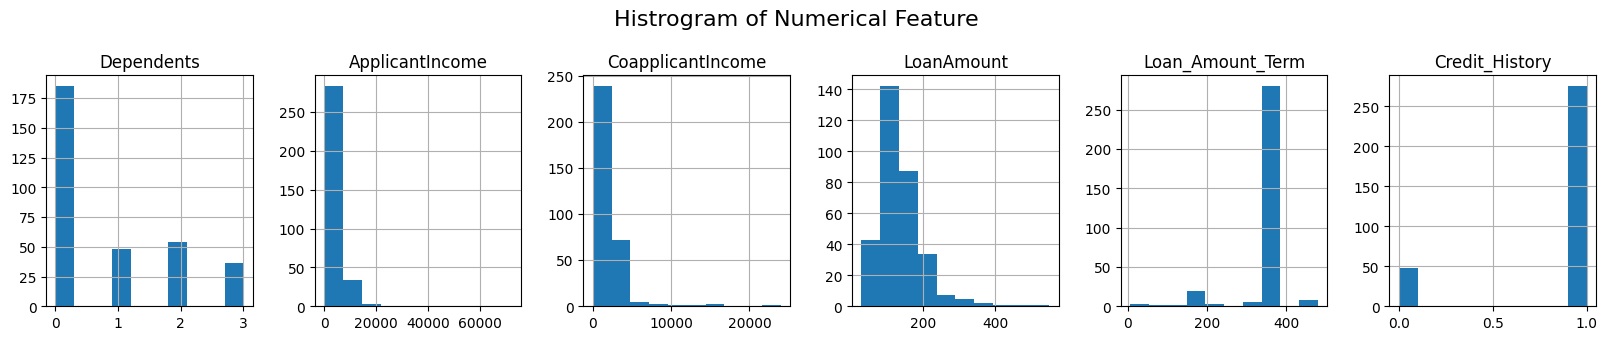

In [106]:
# Univariate Visualization for Numerical Analysis

data.hist(layout=(1,6), figsize=(20,3))
plt.suptitle("Histrogram of Numerical Feature",fontsize=16, y=1.1)
plt.show()

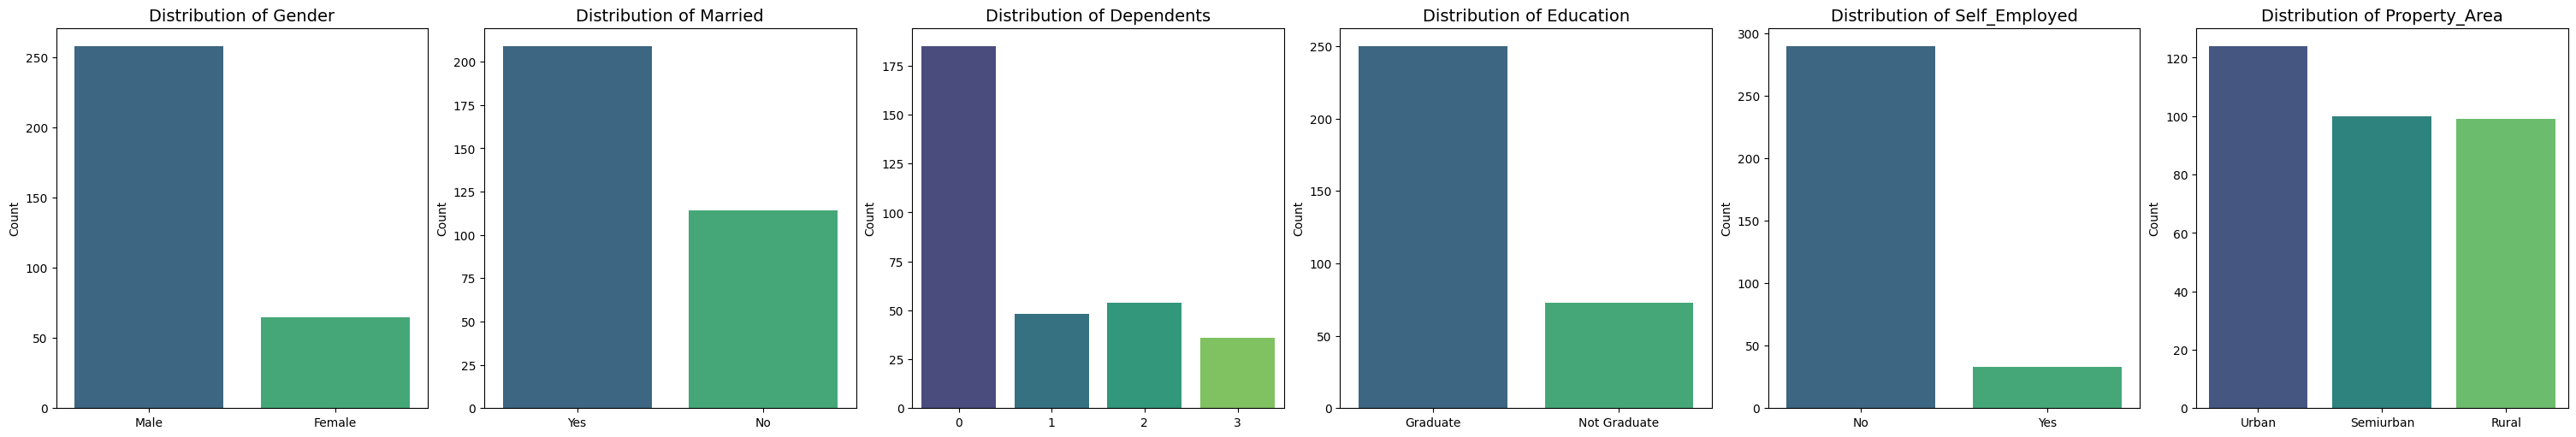

In [109]:
# Univariate Analysis of categorical features
n_features = len(categorical_features)
fig, axes = plt.subplots(nrows=1, ncols=n_features, figsize=(5 * n_features, 5), constrained_layout=True)

# Iterate through categorical features and create a bar plot for each
for i, feature in enumerate(categorical_features):
    sns.countplot(data=data, x=feature, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Distribution of {feature}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.show()